In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist

In [338]:
df_scal_sym = pd.read_csv('data/rosstat_data_scal_sym.csv')
df_scal_sym = df_scal_sym.set_index('region')

df_scal = pd.read_csv('data/rosstat_data_scal.csv')
df_scal = df_scal.set_index('region')
df_scal.sample(5)

,pcci_mean,fwp_mean,rpay_cum,cmr_mean,cmu_mean,alco_mean,grp_mean,hc_proc_ИС,hi_proc_НУЖУ,mad_mean,nm_mean,ppr_mean,ps_mean_proc_child,ps_mean_proc_pension,ps_mean_proc_work,rp_mean,rtpc_mean,wes_mean,pop_2023,dta_proc
region,,,,,,,,,,,,,,,,,,,,
владимирская_область,-0.352036,-0.219191,0.170342,-0.008772,0.254682,-0.031816,-0.282796,-0.135947,-1.000000,0.595097,0.000000,-0.122449,0.833333,5.000000,0.0,0.301987,-0.280475,0.228972,0.122608,0.726272
пермский_край,0.274921,0.220064,0.493810,0.798246,1.093633,1.098190,0.355584,-0.711737,0.173077,0.650448,1.133333,0.095238,0.166667,-0.333333,-0.2,1.870375,0.282943,0.098131,0.859795,0.149510
красноярский_край,0.418409,0.945239,1.248569,1.824561,1.696629,0.437191,1.557495,-0.453624,0.673077,0.000000,1.386328,0.605442,-0.166667,0.000000,0.2,0.805347,0.042112,-0.163551,1.069945,-0.644411
ямало_ненецкий_автономный_округ,6.710402,4.689029,1.048327,-0.008772,-0.273408,1.094350,18.551155,0.142020,0.673077,1.657613,-0.266244,-1.370748,1.333333,-1.666667,-0.8,3.663346,1.016295,-2.070093,-0.384158,-2.231987
тульская_область,0.113302,0.133772,0.185745,-0.035088,0.280899,-0.020296,0.023082,-0.255076,-1.826923,-0.437421,0.019367,-0.656463,0.000000,-0.666667,0.2,0.721119,0.180403,0.261682,0.219808,0.957827


### 3.1. Подбор оптимального количества кластеров

**Метод локтя**

<Axes: xlabel='cluster', ylabel='inertia'>

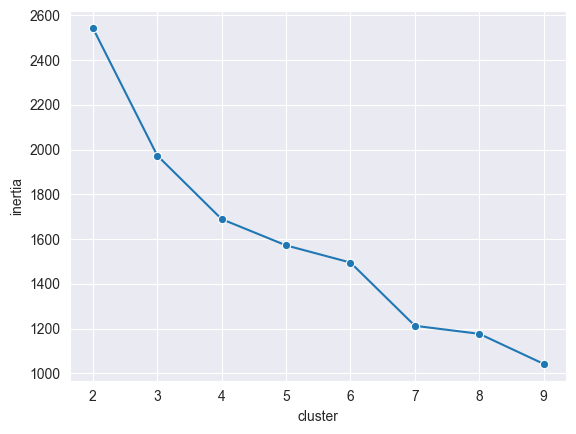

In [339]:
X = df_scal.copy()

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df_scal

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(2, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

**Метод силуэта**

<Axes: xlabel='cluster', ylabel='silhouette'>

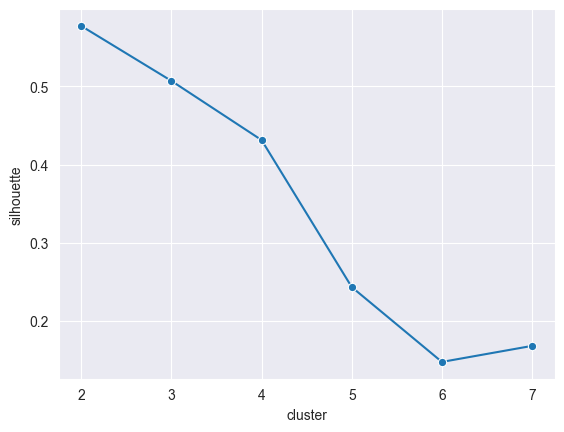

In [340]:
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42, n_init=10)
    labels = k_means.fit_predict(X)   # получаем метки кластеров
    silhouette = silhouette_score(X, labels)
    return silhouette

# создадим пустой словарь
silhouette_res = {"silhouette": [], "cluster": []}

# считаем силуэт для k=3..7
for cluster_num in range(2, 8):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, df_scal))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм
silhouette_df = pd.DataFrame(silhouette_res)

# визуализация
sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")

> Метод локтя показывает самый четкий перегиб при количестве кластеров k = 4

> По методу силуэта максимальное, наиболее приемлемый вариант k = 2

***Для данной задачи количество кластеров k = 2 не подходит, так как модель будет выделять самые успешные регионы, а остальные 80% данных будут находится в одном кластере***

> Для поиска регионов, в которых высокий уровень бедности болше подоёдет k = 4, так как 80% имеют высокую плотность и плохо разделимы

In [341]:
# Функция оценки качества

def cluster_quality(X, labels):
    if len(set(labels)) < 2:
        return {"Silhouette": None, "CH": None, "DB": None}
    return {
        "Silhouette": silhouette_score(X, labels),
        "CH": calinski_harabasz_score(X, labels),
        "DB": davies_bouldin_score(X, labels)
    }

In [342]:
# Метрики по каждому методу

metrics_dict = {}

### 3.2.1 K-means кластеризация - несимметричные данные

{'Silhouette': np.float64(0.431435761773941), 'CH': np.float64(31.039894131945157), 'DB': np.float64(0.950499258541477)}


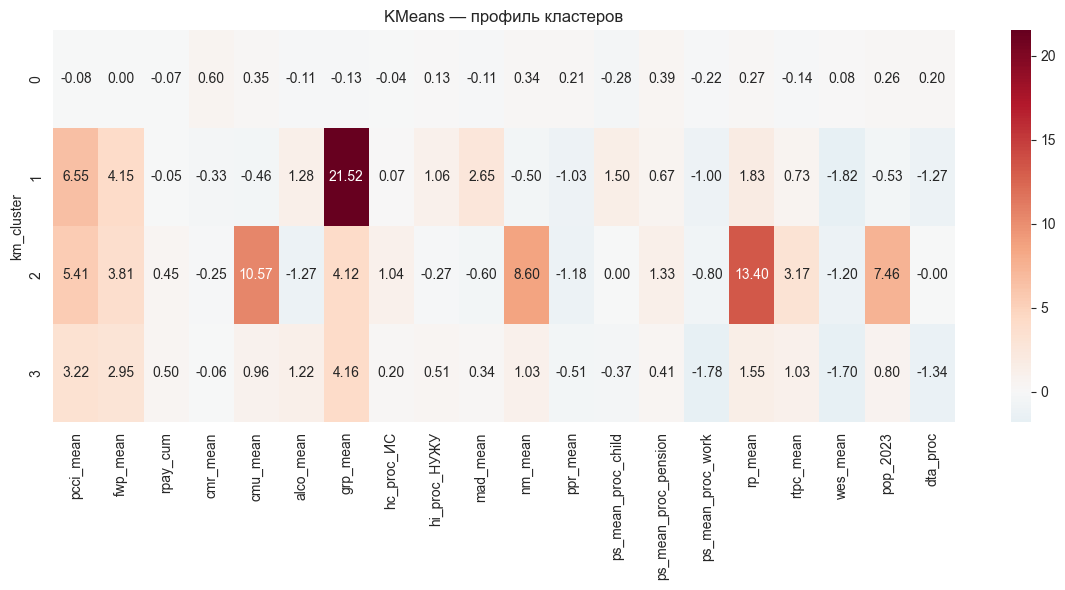

In [343]:
# Количество кластеров
k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
labels_km = kmeans.fit_predict(df_scal)

# добавляем кластеры в исходный df
df_clusters = df_scal.copy()
df_clusters["km_cluster"] = labels_km

# делаем сводку по средним значениям признаков
summary = df_clusters.groupby("km_cluster").mean().round(2)

metrics_dict['K-means'] = cluster_quality(df_scal, labels_km)
print(metrics_dict['K-means'])

# визуализация
plt.figure(figsize=(12, 6))
sns.heatmap(
    summary,
    cmap="RdBu_r", center=0, annot=True, fmt=".2f"
)
plt.title("KMeans — профиль кластеров")
plt.tight_layout()
plt.show()

In [344]:
print(f'Количество регионов с наиболее высоким показателем малообеспеченных: {len(df_clusters[df_clusters["km_cluster"] == 0])}')

Количество регионов с наиболее высоким показателем малообеспеченных: 73


> Показатели K-means кластреизации неинформативны для данной задачи, наиболее бедные регионы не выделяются в кластер
> Наиболее выделяется признак grp (Среднегодовой показатель ВРП), так как данный признак имеет широкий диапазон значений и регионы относительно с высоким ВРП консолидируются в 3х кластерах

***Повторим метод K-means на данных df_scal_sym, в которых устранена асиметрия***

### 3.2.2 K-means кластеризация - симметричные данные

{'Silhouette': np.float64(0.1389344445597905), 'CH': np.float64(15.1346752548635), 'DB': np.float64(1.8542398622736584)}


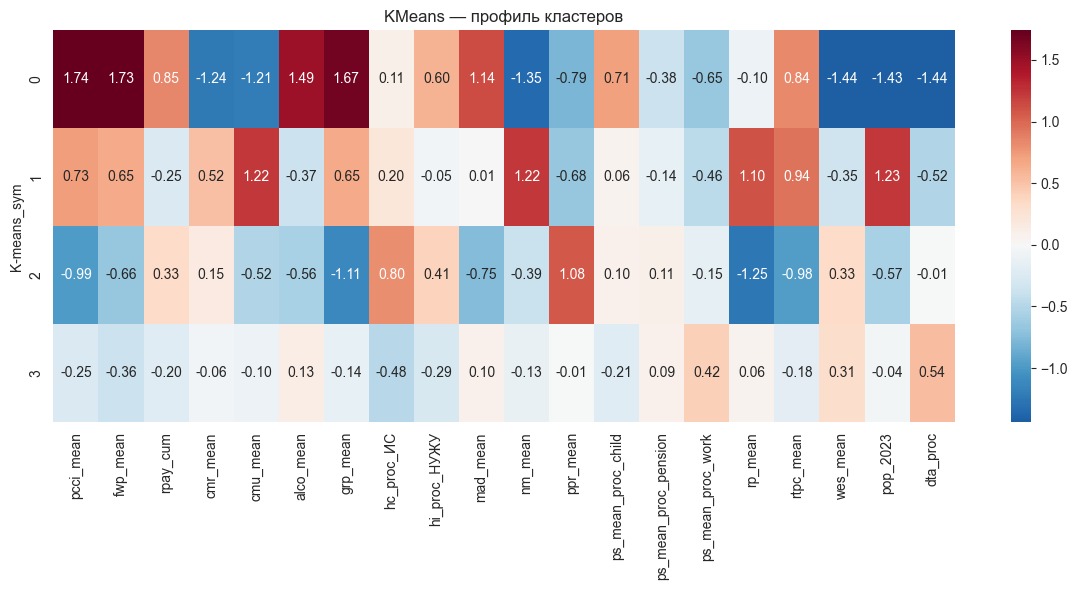

In [345]:
k = 4 #Кол-во кластеров
kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
labels_km_sym = kmeans.fit_predict(df_scal_sym)

# добавляем кластеры в исходный df
df_clusters_sym = df_scal_sym.copy()
df_clusters_sym["K-means_sym"] = labels_km_sym

# делаем сводку по средним значениям признаков
summary_sym = df_clusters_sym.groupby("K-means_sym").mean().round(2)

metrics_dict['K-means_sym'] = cluster_quality(df_scal_sym, labels_km_sym)
print(metrics_dict['K-means_sym'])

# визуализация
plt.figure(figsize=(12, 6))
sns.heatmap(
    summary_sym,
    cmap="RdBu_r", center=0, annot=True, fmt=".2f"
)
plt.title("KMeans — профиль кластеров")
plt.tight_layout()
plt.show()

> На симметричных признаках картина выгляти более читабельно:

- Регионы с высокой долей малоимущих выделены в кластер 2

- Наиболее успешные регионы выделены в кластер 0 

### 3.3.1. Иерархическая кластеризация с дендограммой - несимметричные данные

Cophenetic correlation: 0.799


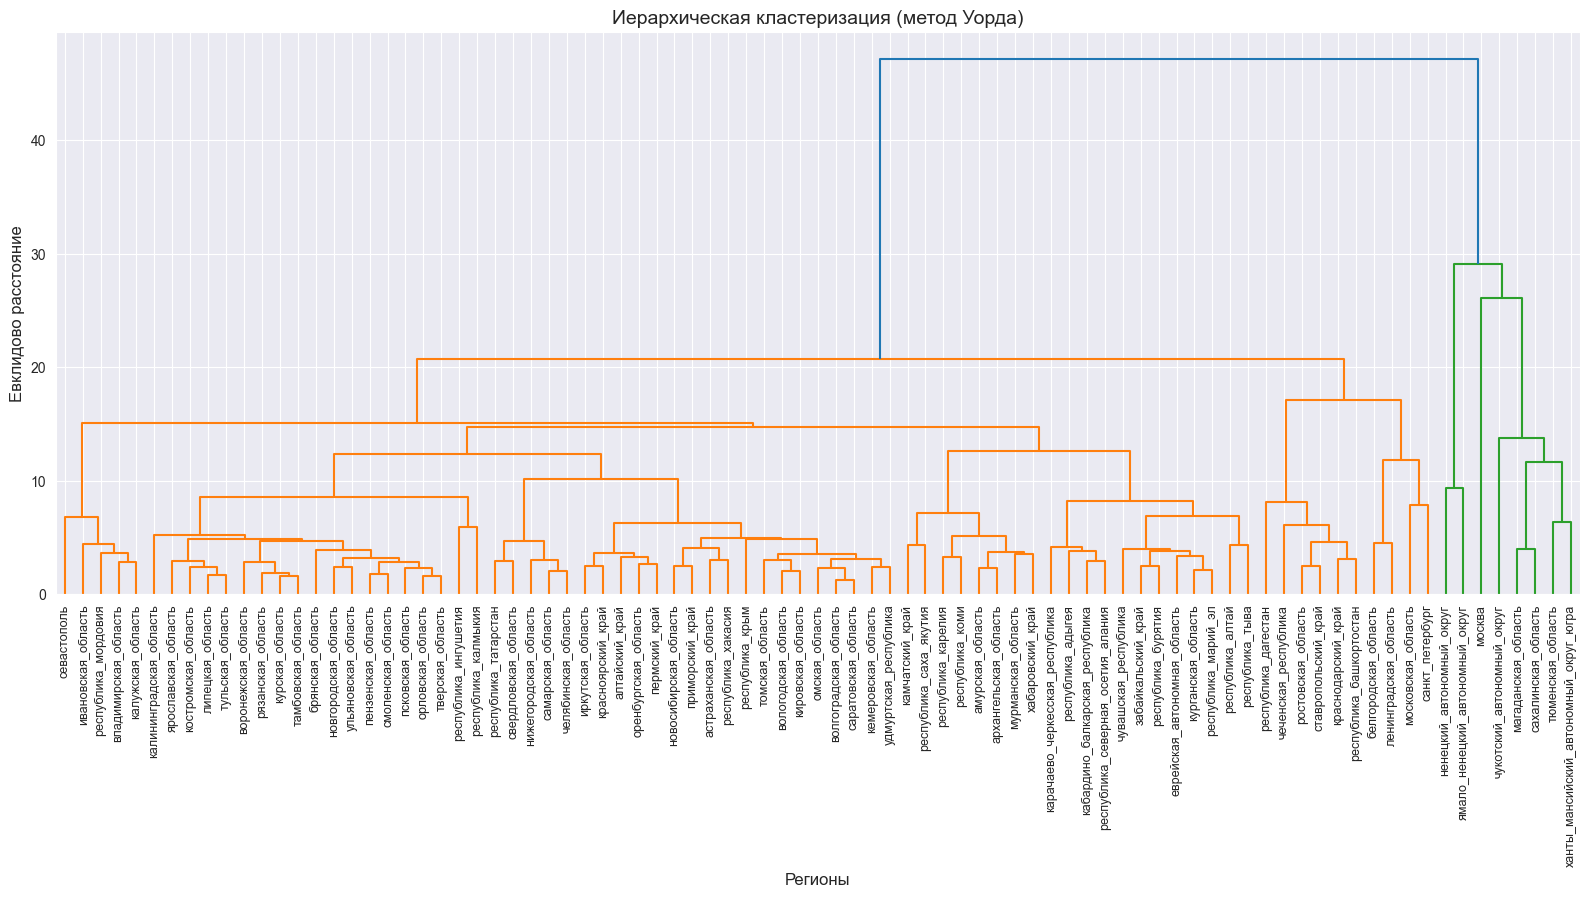

In [347]:
X = df_scal.copy()

# Матрица признаков
Z = linkage(X.values, method='ward', metric='euclidean')

# коэффициент копенетичности
coph_corr, _ = cophenet(Z, pdist(X.values, metric='euclidean'))
print(f"Cophenetic correlation: {coph_corr:.3f}")

plt.figure(figsize=(16, 8))
dn = dendrogram(
    Z,
    labels=X.index.tolist(),
    leaf_rotation=90,       # подписи вертикально, удобнее читать
    leaf_font_size=9,       # чуть крупнее
    color_threshold=None    # пусть SciPy сам раскрасит по последнему шагу
)

plt.title("Иерархическая кластеризация (метод Уорда)", fontsize=14)
plt.xlabel("Регионы", fontsize=12)
plt.ylabel("Евклидово расстояние", fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # больше места для подписей регионов
plt.show()

{'Silhouette': np.float64(0.4765760087151602), 'CH': np.float64(29.89363161453476), 'DB': np.float64(0.7811424400043079)}


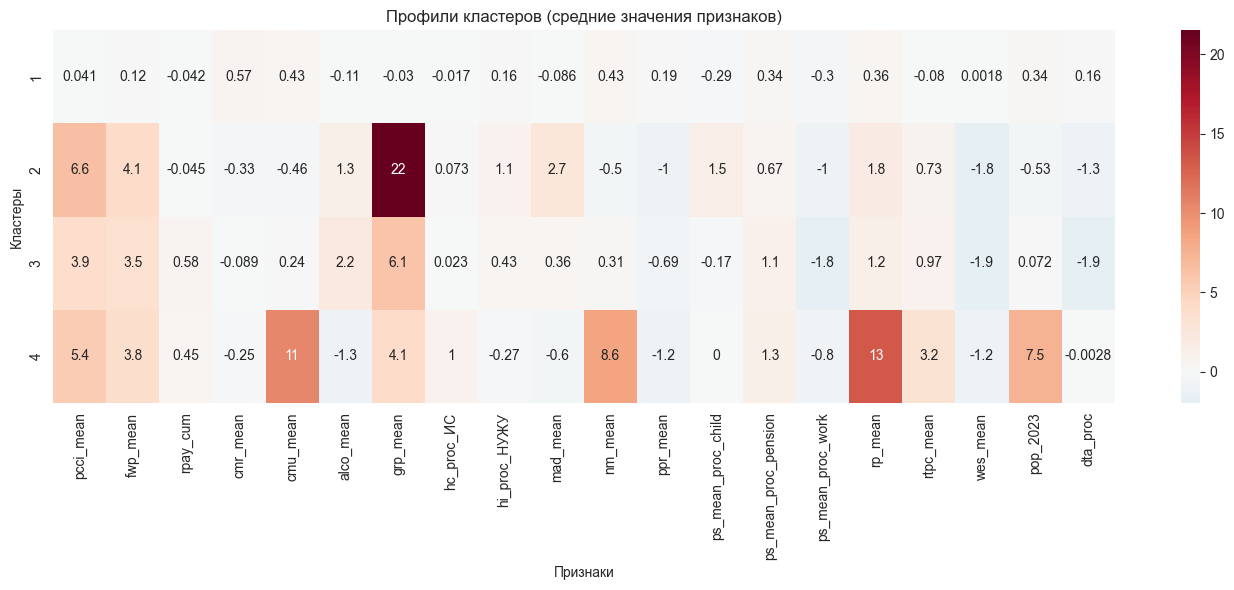

In [349]:
k = 4
labels_dg = fcluster(Z, t=k, criterion="maxclust")

# Передаём результаты в датасет df_clusters
df_clusters["dg_cluster"] = labels_dg

clusters_drop = df_clusters.drop('km_cluster',axis=1)
profile_mean = clusters_drop.groupby("dg_cluster").mean()

# симметричные данные
metrics_dict['dendogram_clust'] = cluster_quality(X, labels_dg)
print(metrics_dict['dendogram_clust'])

plt.figure(figsize=(14, 6))
sns.heatmap(
    profile_mean,  # твоя таблица профилей
    cmap="RdBu_r", 
    center=0,      # чтобы различия видны были относительно нуля
    annot=True
)
plt.title("Профили кластеров (средние значения признаков)")
plt.xlabel("Признаки")
plt.ylabel("Кластеры")
plt.tight_layout()
plt.show()

In [270]:
print(f'Количество регионов с наиболее высоким показателем малообеспеченных: {len(df_clusters[df_clusters["dg_cluster"]==1])}')

Количество регионов с наиболее высоким показателем малообеспеченных: 77


> Результаты на нессиметричных данных похожи на результаты K-means
- Большая часть регионов находится в одном кластере
- Дендограмма делится на 4 кластера, оставляя в первом 90% регионов
- Согласно схеме, что бы дендограмма улавливана самые бедные регионы, нужно 9 кластеров

### 3.3.2. Иерархическая кластеризация с дендограммой - симметричные данные

Cophenetic correlation: 0.620


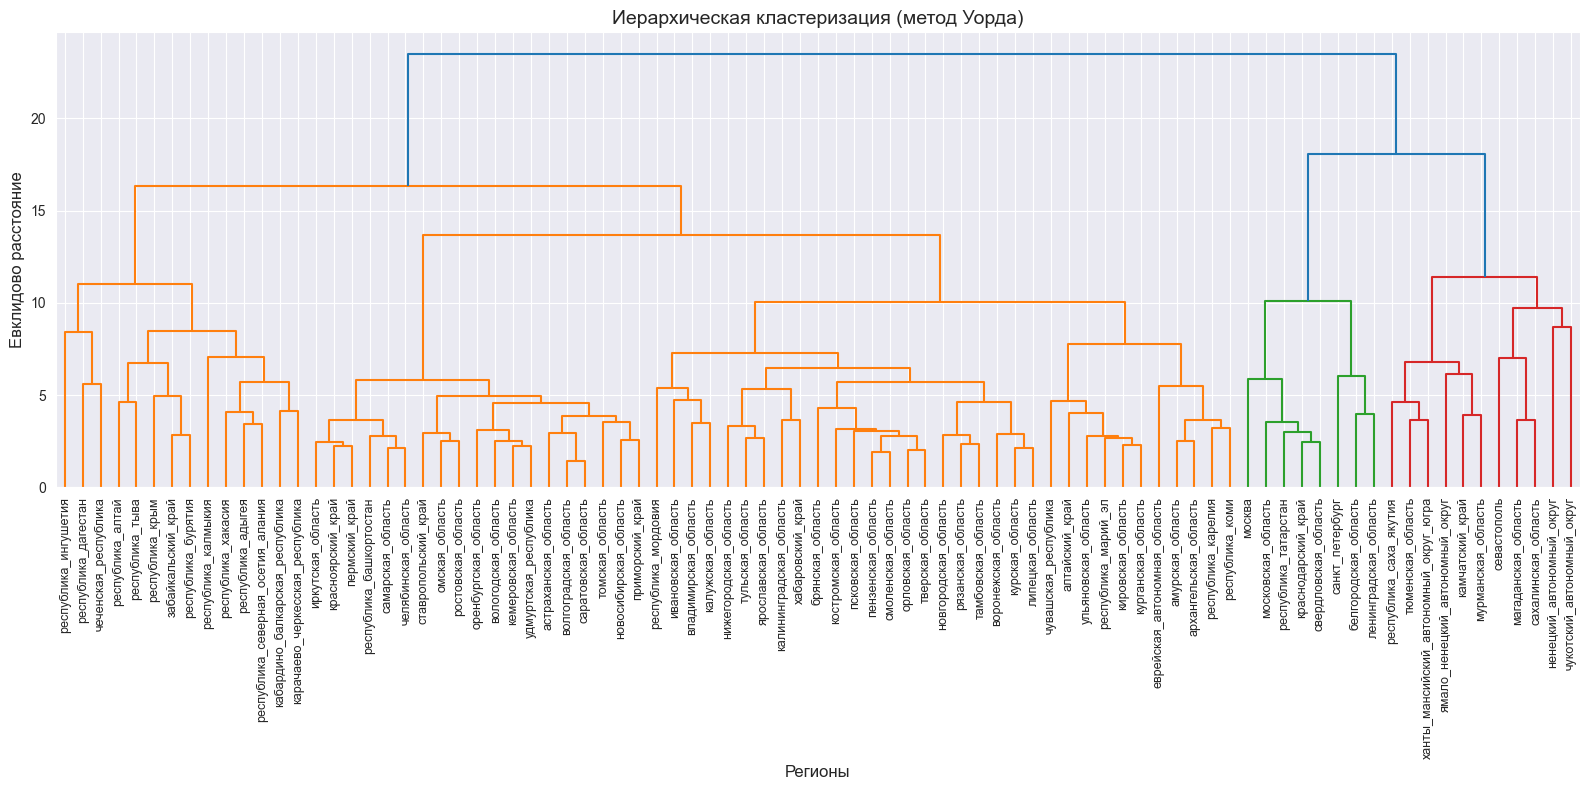

In [350]:
X = df_scal_sym

# Матрица признаков
Z = linkage(X.values, method='ward', metric='euclidean')

# коэффициент копенетичности
coph_corr, _ = cophenet(Z, pdist(X.values, metric='euclidean'))
print(f"Cophenetic correlation: {coph_corr:.3f}")

plt.figure(figsize=(16, 8))
dn = dendrogram(
    Z,
    labels=X.index.tolist(),
    leaf_rotation=90,
    leaf_font_size=9,     
    color_threshold=None  
)

plt.title("Иерархическая кластеризация (метод Уорда)", fontsize=14)
plt.xlabel("Регионы", fontsize=12)
plt.ylabel("Евклидово расстояние", fontsize=12)

plt.tight_layout()
plt.subplots_adjust()

{'Silhouette': np.float64(0.17589628859866893), 'CH': np.float64(13.71872545291141), 'DB': np.float64(1.759842569432475)}


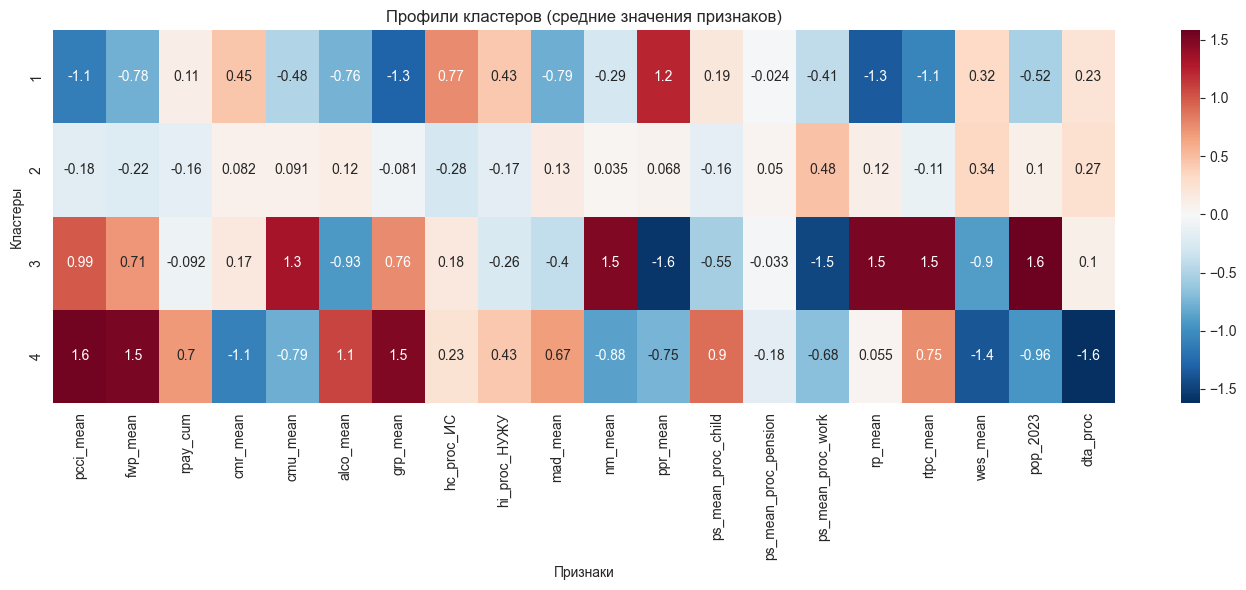

In [351]:
# Количетво кластеров
k = 4
labels_dg = fcluster(Z, t=k, criterion="maxclust")


# Передаём результаты в датасет df_clusters_sym
df_clusters_sym["dg_cluster_sym"] = labels_dg

clusters_drop = df_clusters_sym.drop('K-means_sym',axis=1)
profile_mean = clusters_drop.groupby("dg_cluster_sym").mean()

# Запись метрик
metrics_dict['dendogram_clust_sym'] = cluster_quality(X, labels_dg)
print(metrics_dict['dendogram_clust_sym'])

plt.figure(figsize=(14, 6))
sns.heatmap(
    profile_mean,
    cmap="RdBu_r", 
    center=0, 
    annot=True
)
plt.title("Профили кластеров (средние значения признаков)")
plt.xlabel("Признаки")
plt.ylabel("Кластеры")
plt.tight_layout()
plt.show()

> На симметричных данных дендограмма выглядит более информативно
- при 4-х кластерах явно выделяются наиболее бедные регионы
- в середине остаётся основная масса (50%) регионов
- В первых двух кластерах наиболее успешниые по уровню ВРП регионы

### 3.4.1 K-means с понижением размерности PCA - несимметирчные данные

Число компонент: 7
Суммарная объяснённая дисперсия: 0.825


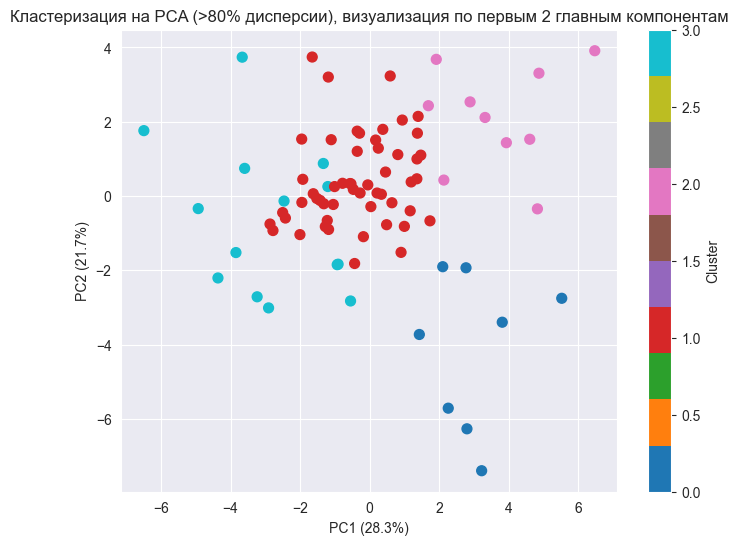

In [510]:

# PCA с сохранением 80% дисперсии
pca = PCA(n_components=0.8, random_state=42)
X_pca = pca.fit_transform(df_scal_sym)

print("Число компонент:", pca.n_components_)
print("Суммарная объяснённая дисперсия:", pca.explained_variance_ratio_.sum().round(3))

# K-means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)


metrics_dict['PCA_Km_clust_sym'] = cluster_quality(X_pca, labels)

# визуализация: первые 2 ПК
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="tab10", s=50)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Кластеризация на PCA (>80% дисперсии), визуализация по первым 2 главным компонентам")
plt.colorbar(label="Cluster")
plt.show()

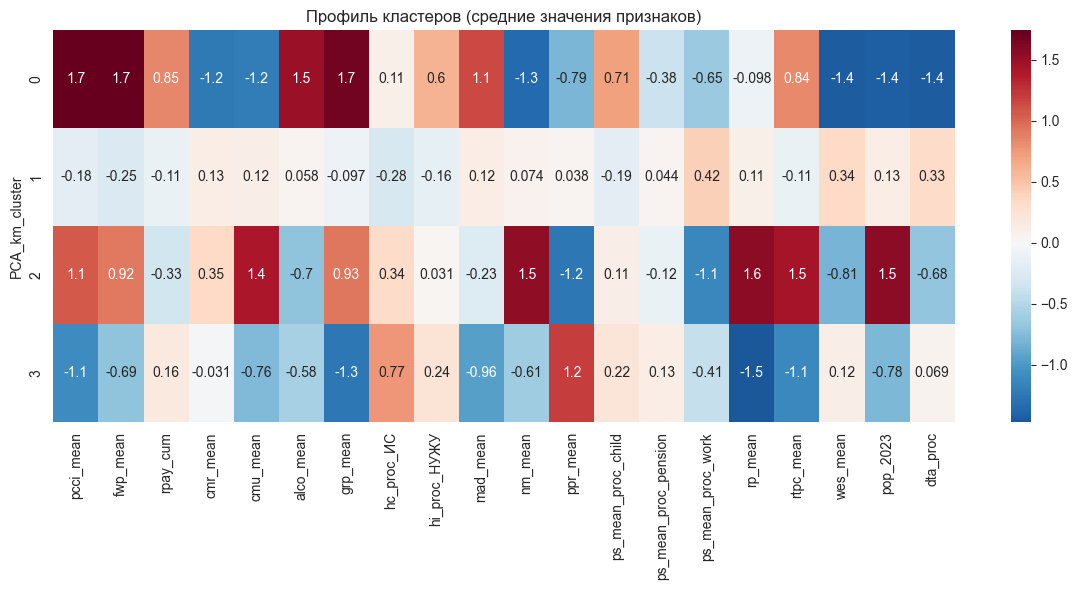

In [355]:

df_clusters_sym = df_clusters_sym.copy()
df_clusters_sym["PCA_km_cluster"] = labels
clusters_drop = df_clusters_sym.drop(['K-means_sym', 'dg_cluster_sym'], axis = 1)
cluster_profile = clusters_drop.groupby("PCA_km_cluster").mean()

# Тепловая карта распределения
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile, cmap="RdBu_r", annot = True, center=0)
plt.title("Профиль кластеров (средние значения признаков)")
plt.tight_layout()
plt.show()

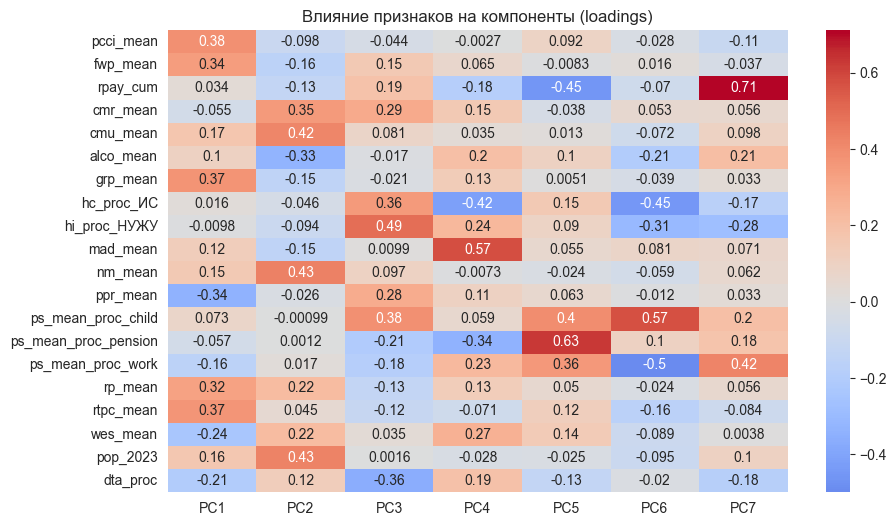

In [ ]:
# Тепловая карта признаков, оказывающих наибольшее влияние в каждой компоненте

loadings_df = pd.DataFrame(
    pca.components_.T,
    index=df_scal.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

plt.figure(figsize=(10,6))
sns.heatmap(loadings_df, annot=True, cmap="coolwarm", center=0)
plt.title("Влияние признаков на компоненты (loadings)")
plt.show()

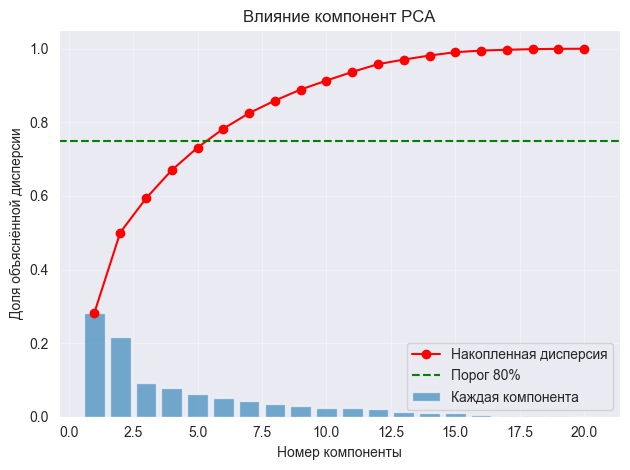

In [511]:
# Все компоненты PCA
pca_full = PCA().fit(df_scal_sym)

# Доли дисперсии по каждой компоненте
var_ratio = pca_full.explained_variance_ratio_

# Кумулятивная сумма
cum_var = np.cumsum(var_ratio)

# Столбики по отдельным компонентам
plt.bar(range(1, len(var_ratio)+1), var_ratio, alpha=0.6, label="Каждая компонента")

# Линия накопленной суммы
plt.plot(range(1, len(cum_var)+1), cum_var, marker="o", color="red", label="Накопленная дисперсия")

# Порог 75%
plt.axhline(0.75, color="green", linestyle="--", label="Порог 80%")

plt.xlabel("Номер компоненты")
plt.ylabel("Доля объяснённой дисперсии")
plt.title("Влияние компонент PCA")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 3.5. Оценка метрик

### 3.5.1. Внутренние метрики

In [461]:
df_metric = pd.DataFrame(metrics_dict)
df_metric

,K-means,K-means_sym,dendogram_clust,dendogram_clust_sym,PCA_Km_clust_sym
Silhouette,0.431436,0.138934,0.476576,0.175896,0.241294
CH,31.039894,15.134675,29.893632,13.718725,20.496628
DB,0.950499,1.854240,0.781142,1.759843,1.423414


In [462]:
results = df_clusters[['km_cluster', 'dg_cluster']]
results = pd.concat([results, df_clusters_sym[['K-means_sym', 'dg_cluster_sym', 'PCA_km_cluster']]], axis=1) 

> Согласно полученным метрикам - лучшие результаты показали модели **K-means** и **dendogram** на несимметричных данных, однако данные алгоритмы не подходят, так так у нас смазанные ***(плохоразделяемые)*** данные и на их фоне несколько успешных регоинов сильно выделяются. 

***Северные, дальневосточные округа, города федерального значения*** - данные регионы имеют высокий уровень ВРП, развитую промышенность и высокий оборот розничной торговли

> Модели на симметирчных данных показывают более информативный результат:

1. K-means_sym: 
    - самые слабые метрики; 
    - Бедные регионы выделяются хорошо в кластере 2;
    - Среднее ppr - 1.08;
    - Доля бедных регионов - 21 %.

2. dg_cluster_sym:
    - cлабые метрики; 
    - Бедные регионы выделяются хорошо в кластере 1;
    - Среднее ppr - 1.2;
    - Доля бедных регионов - 16 %;

3. PCA_km_cluster 
    - Наилучшие метрики по симметирчным данным. 
    - Бедные регионы выделяются хорошо в кластере 3. 
    - Среднее ppr - 1.2
    - Доля бедных регионов - 16 %;


### 3.5.2. Внешние метрики

> Сравнение кластеризированных регионов с ручным разпределением (см. раздел 2.1)

- для сравнения возьмем метирку ***adjusted_rand_score***

в качестве сравниваемых методов возьмем 
> Иерархическую кластеризацию с дендограммой ***[dg_cluster_sym]*** и K-means кластеризацию с понижением размерности ***[PCA_km_cluster]*** на ***симметирчных данных***

In [463]:
# Исходный датасет

df = pd.read_csv('data/rosstat_data_clean.csv',index_col=0)

In [464]:
# Подготовка кластеров
results['dg_cluster_sym'] = results['dg_cluster_sym'].replace({4 : 0, 1 : 3, 2 : 1, 3 : 2})
df_clust = pd.concat([df, results[['PCA_km_cluster', 'dg_cluster_sym']]],axis = 1)

In [465]:
# считаем количество регионов в каждом кластере
cluster_counts = df_clust['PCA_km_cluster'].value_counts().sort_index()

# переводим в проценты
cluster_percents = (cluster_counts / cluster_counts.sum() * 100).round(2)

# объединяем в одну таблицу
summary = pd.DataFrame({
    "count": cluster_counts,
    "percent": cluster_percents
})

print(summary)

                count  percent
PCA_km_cluster                
0                   8     9.41
1                  53    62.35
2                  10    11.76
3                  14    16.47


> Уже имеем предварительно разбитый на кластеры датасет в котором выделены наиболее богатые и бедные регионы:

Карта класетров:
- 3 - регионы с наибольшей долей малоимущих
- 2 - регионы с наименьшей долей малоимущих
- 1 - регионы которые не попали ни в одну из групп
- 0 - регионы с умеренной долей малоимущих

> Переименуем кластеры 2 и 0 в соответствии с ***PCA_km_cluster***, кластеры 1 и 0 разделим в соотношении 6/1

In [466]:
clusters = pd.read_csv('data/clusters.csv')

# 1) Копия
df = clusters.copy()

# 2) Переименовать кластеры: 2 -> 3, 0 -> 2 (остальные без изменений)
df["cluster_beta"] = df["cluster_beta"].replace({2 : 3, 0 : 2})

# 3) В оставшиеся объекты (не 3 и не 2) рандомно добавить класс 1
#    с соотношением 6:1 (т.е. P(1)=6/7, P(0)=1/7)

mask_rest = ~df["cluster_beta"].isin([2, 3])
rng = np.random.default_rng(42)               # фиксируем сид для воспроизводимости
p_one = 6/7

df.loc[mask_rest, "cluster_beta"] = rng.choice(
    [1, 0],
    size=mask_rest.sum(),
    p=[p_one, 1 - p_one]
).astype(int)


In [467]:
df = df.set_index('region')
df_clust = pd.concat([df_clust, df], axis=1)

In [468]:
from sklearn.metrics import adjusted_rand_score

Km_score = {}
for i in df_clust['PCA_km_cluster'].value_counts().index.sort_values():
    y_true = (df_clust['cluster_beta'] == i).astype(int)  # замените на нужный класс
    y_pred = (df_clust['PCA_km_cluster'] == i).astype(int)
    
    if i != 3:
        Km_score[f'Кластер {i}'] = round(adjusted_rand_score(y_true, y_pred),2)
    else:
        Km_score[f'Кластер {i} (регионы с высокой долей малоимущих)'] = round(adjusted_rand_score(y_true, y_pred),2)
print(f'ARI: {Km_score}')


ARI: {'Кластер 0': -0.07, 'Кластер 1': 0.3, 'Кластер 2': 0.4, 'Кластер 3 (регионы с высокой долей малоимущих)': 0.67}


In [469]:
Km_score = {}
for i in df_clust['dg_cluster_sym'].value_counts().index.sort_values():
    y_true = (df_clust['cluster_beta'] == i).astype(int)  # замените на нужный класс
    y_pred = (df_clust['dg_cluster_sym'] == i).astype(int)
    
    if i != 3:
        Km_score[f'Кластер {i}'] = round(adjusted_rand_score(y_true, y_pred),2)
    else:
        Km_score[f'Кластер {i} (регионы с высокой долей малоимущих)'] = round(adjusted_rand_score(y_true, y_pred),2)
print(f'ARI: {Km_score}')

ARI: {'Кластер 0': -0.08, 'Кластер 1': 0.27, 'Кластер 2': 0.48, 'Кластер 3 (регионы с высокой долей малоимущих)': 0.57}


> Ориентируясь на кластер малоимущего населения можно сделать вывод, что оба метода спарвляются достаточно хорошо:

- Иерархическая кластеризация сдендограммой - ARI = 0.57
- K-means кластеризация с понижением размерности - ARI = 0.67

## Ввывод :

> По качеству поиска регионов с высокой долей малоимущего населения, а также по внутренним и внешним метрикам выигрывает **K-means кластеризация с понижением размерности - ARI = 0.67**

## Стаститика

In [470]:
df_clust = df_clust.drop(['dg_cluster_sym', 'cluster_beta'], axis = 1)

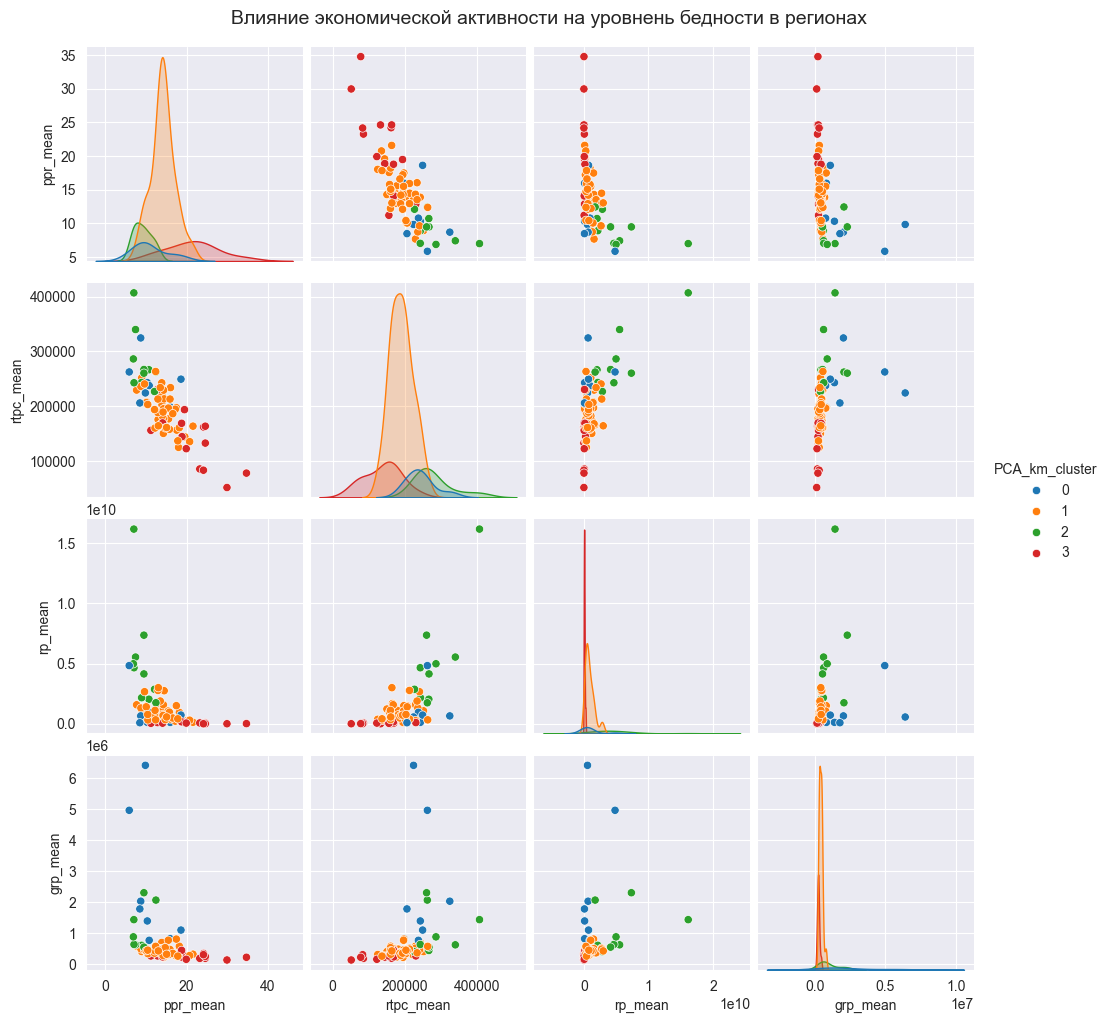

In [514]:
# таргет = Среднегодовой процент людей, живущих за чертой бедности
target = "ppr_mean"

# Экономика
sns.pairplot(df_clust, vars = [target, "rtpc_mean", "rp_mean", "grp_mean"], hue="PCA_km_cluster", palette="tab10")
plt.suptitle("Влияние экономической активности на уровнень бедности в регионах", fontsize=14, y=1.02)
plt.show()

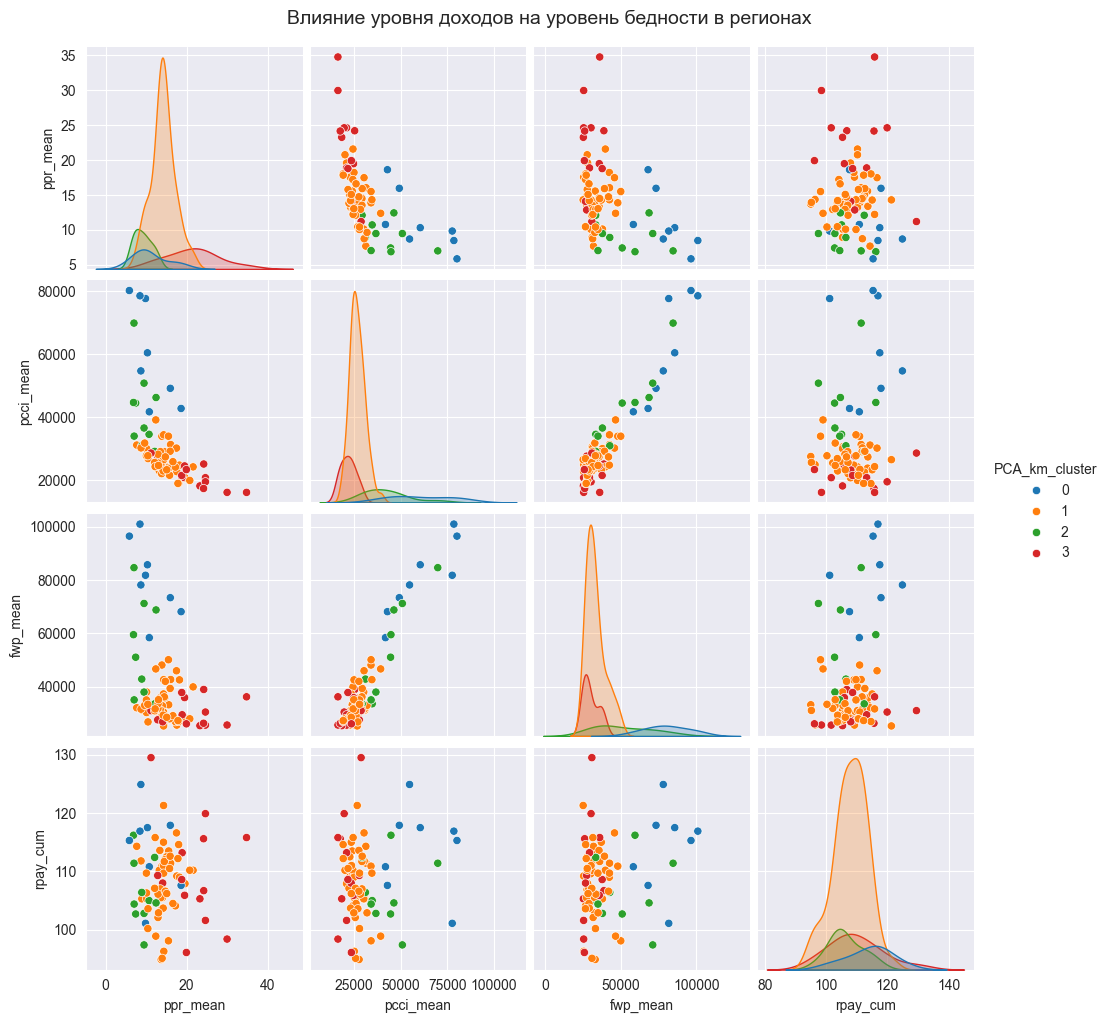

In [516]:
# Экономика
sns.pairplot(df_clust, vars = [target, "pcci_mean", "fwp_mean", 'rpay_cum'], hue="PCA_km_cluster", palette="tab10")
plt.suptitle("Влияние уровня доходов на уровень бедности в регионах", fontsize=14, y=1.02)
plt.show()

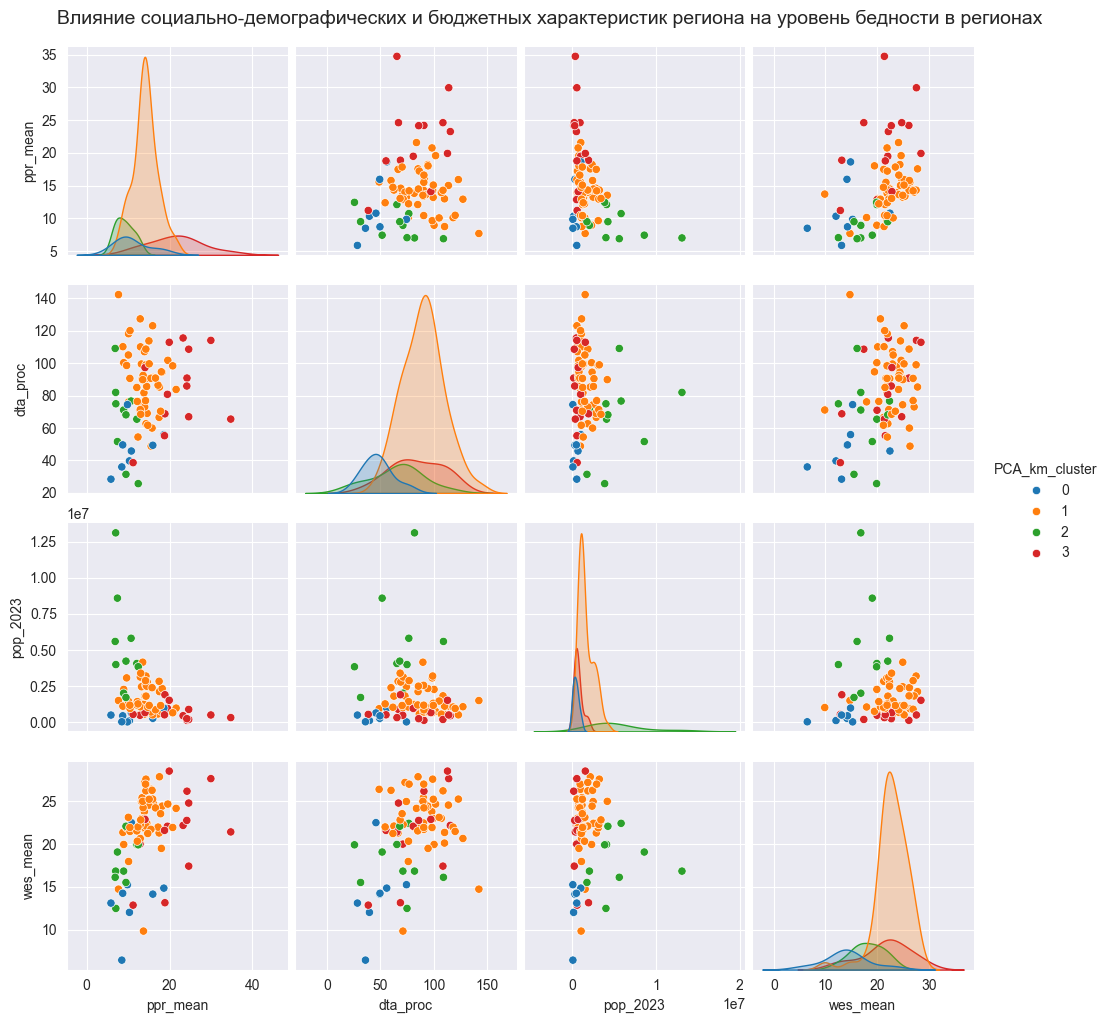

In [517]:
# Экономика
sns.pairplot(df_clust, vars = [target, "dta_proc", "pop_2023", 'wes_mean'], hue="PCA_km_cluster", palette="tab10")
plt.suptitle("Влияние социально-демографических и бюджетных характеристик региона на уровень бедности в регионах", fontsize=14, y=1.02)
plt.show()

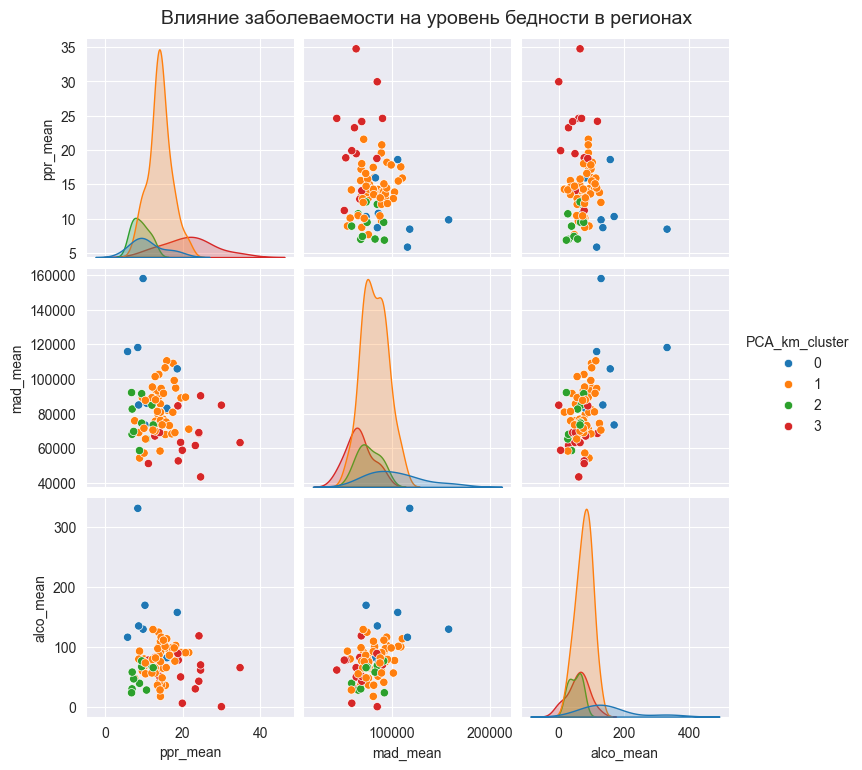

In [518]:
# Экономика
sns.pairplot(df_clust, vars = [target, 'mad_mean', 'alco_mean'], hue="PCA_km_cluster", palette="tab10")
plt.suptitle("Влияние заболеваемости на уровень бедности в регионах", fontsize=14, y=1.02)
plt.show()

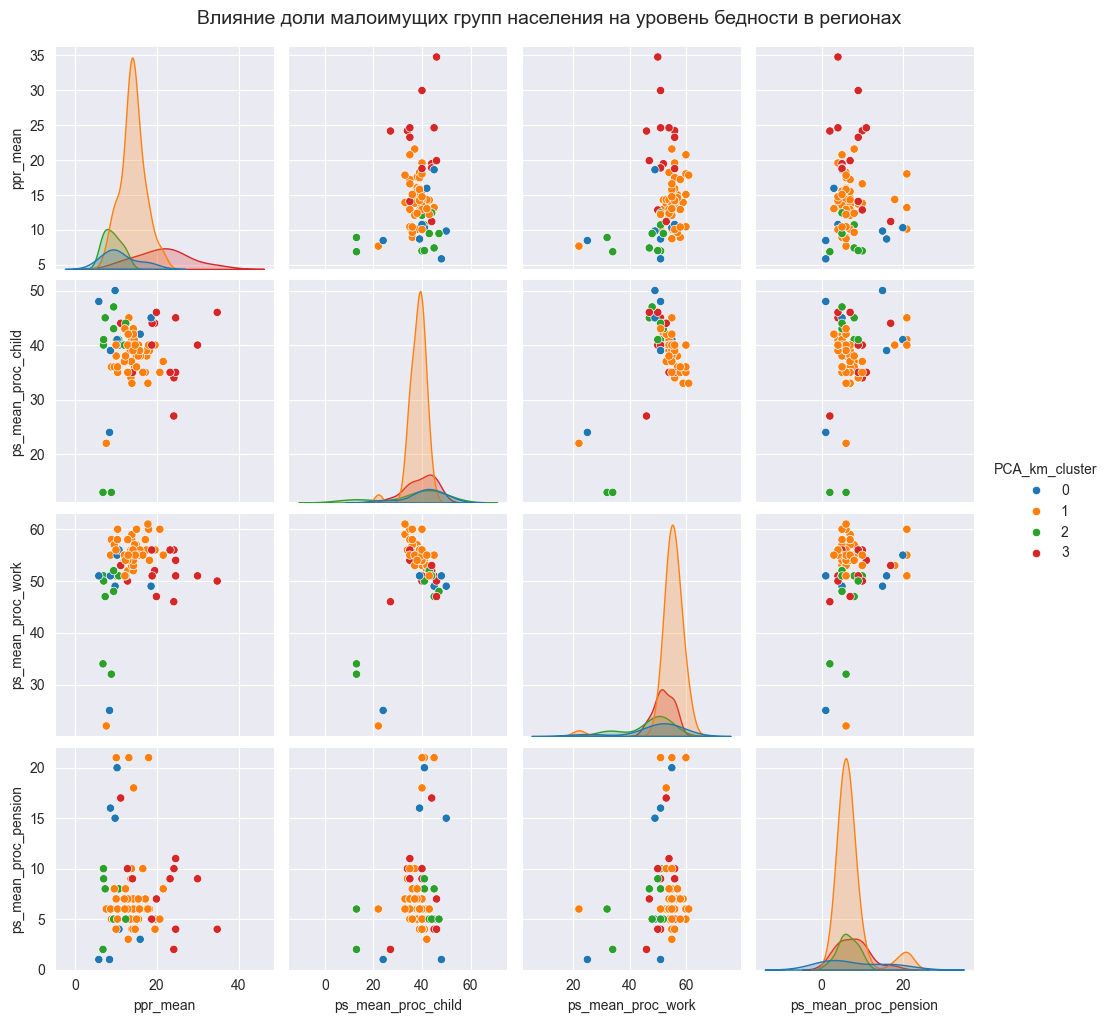

In [521]:
# Экономика
sns.pairplot(df_clust, vars = [target, "ps_mean_proc_child", "ps_mean_proc_work", 'ps_mean_proc_pension'], hue="PCA_km_cluster", palette="tab10")
plt.suptitle("Влияние доли малоимущих групп населения на уровень бедности в регионах", fontsize=14, y=1.02)
plt.show()

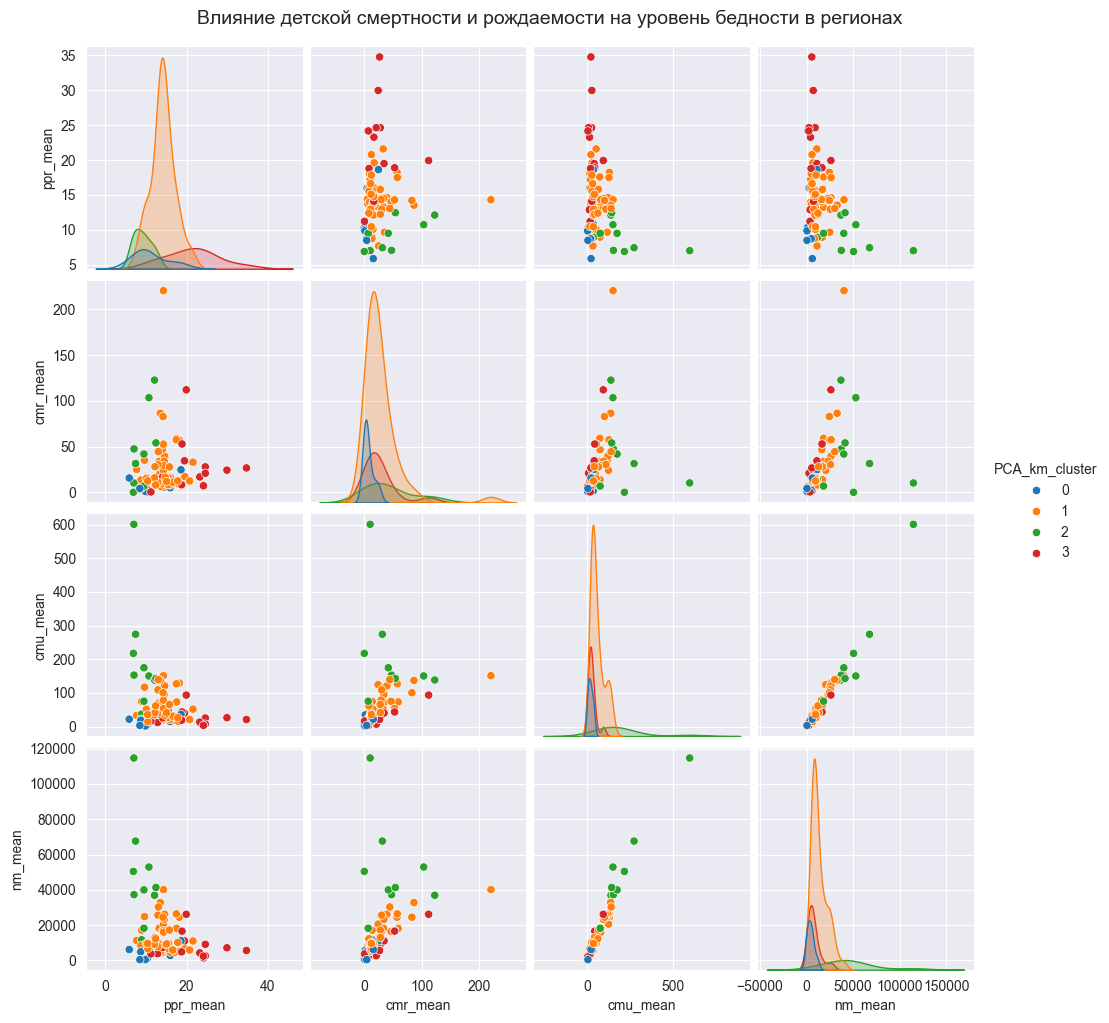

In [522]:
# Экономика
sns.pairplot(df_clust, vars = [target, "cmr_mean", "cmu_mean", "nm_mean"], hue="PCA_km_cluster", palette="tab10")
plt.suptitle("Влияние детской смертности и рождаемости на уровень бедности в регионах", fontsize=14, y=1.02)
plt.show()

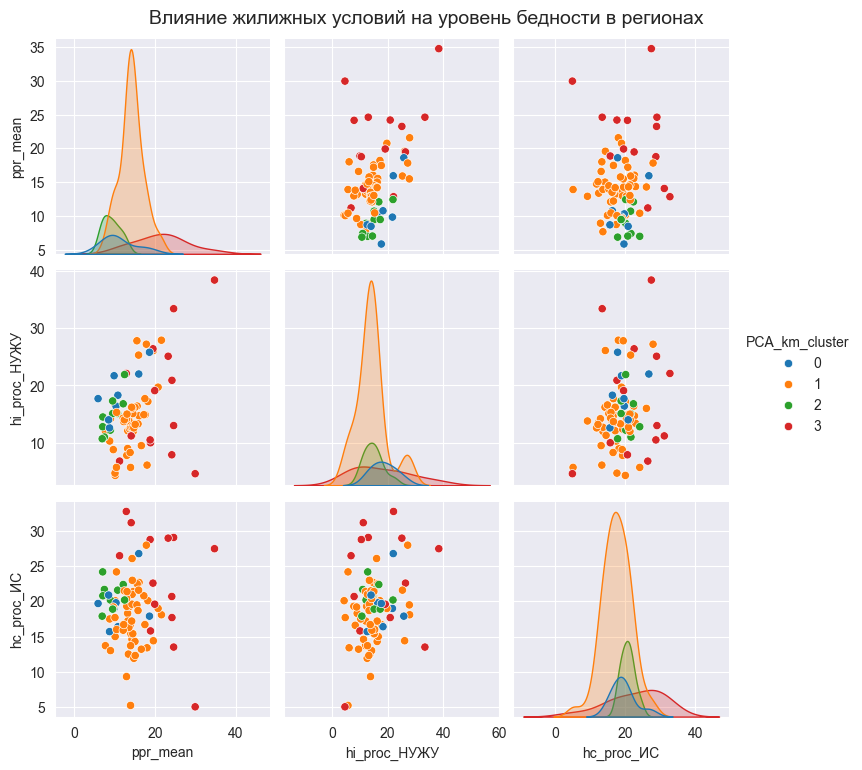

In [523]:
# Экономика
sns.pairplot(df_clust, vars = [target, "hi_proc_НУЖУ", "hc_proc_ИС"], hue="PCA_km_cluster", palette="tab10")
plt.suptitle("Влияние жилижных условий на уровень бедности в регионах", fontsize=14, y=1.02)
plt.show()

# Итоговый вывод

Выполнена задача кластеризиции регионов РФ.

Наиболее оптимальный результат показывает алгоритм **K-means + PCA**

После понижения размерности метод сохраняет более 80% информации, уменьшая датасет до 7 компонент

Внутренние метрики кластеризации:

- silhouette_score: 0.241294
- calinski_harabasz_score: 20.50
- davies_bouldin_score: 1.42

Внешняя мера ***adjusted_rand_score = 0.67*** вычиляется на основании ручного разбиения на кластеры (пересечение коррелирующих признаков с целевым ppr_mean) - см. раздел 2.1

Статистика данных:

1. **Экономическая активность** - **высокое количество малоимущих*** сосредоточено в регионах с низкой экномической активностью (низкие: ВРП, Объём производимых товаров на импорт, оборот розничной торговли в регионе)

2. **Уровень доходов** - высокое количество **малоимущих коррелирует с низким среднедлушевым доходом**

3. **социально-демографические и бюджетные характеристики региона** - Наименьшее количество населения наблюдается в **наиболее малоимущих регионах**. Также в **наиболее малоимущих регионах** наблюдается высокая доля расходов на соц. политику.

4. **Заболеваемость** - Зависимости между уровнем заболеваемости (и алкоголизма) и **наиболее малоимущих регионов не наблдюдается.**

5. **Доля малоимущих групп** - Хаотичное распределение групп, **зависимости нет**

6. **Рождаемость/смертность** - **Регионы с высокой долей малоимущих** отличаются низким показателем раждаемости и низким показателем смертности (в сельской местности).

7. **Жилищные условия** - Наблюдается взаимосвязь. Наибольший показатель неудовлетворённости жилищными условиями наблюдается в **регионах с высокой долей малоимущих**

## Общий вывод по статстике:

Высокая доля малоимущих в регионах связана с несколькими основными показателями:

- уровень ВРП в регионе (признак grp_mean)
- Оборот розничной торговли (признак rtpc_mean)
- Объём отгруженных товаров собственного производств (признак rp_mean)

> Данные показатели набиолее низкие в регионах с высокой долей малоимущих, предположительно данные регионы с плохо развитой промышленностю и производством, скорее всего дотационные регионы. Низкий уровень экономической активности и объём розничной торговли не позволяет создавать много рабочих мест. Предположительно отсюда вытекают низкие показатели по среднедушевым доходам.